In [1]:
from google.colab import files
uploaded = files.upload()

Saving tips.csv to tips.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [4]:
pd.pivot_table(tips, index = 'day',
               columns='size',
               values='total_bill',
               aggfunc='count',fill_value=0)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [5]:
# 빈도표
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [6]:
pc_25 = party_counts.loc[:,2:5]
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [8]:
pc_25.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [9]:
# pc_25 각 열방향 합계 1로 정규화
pc_25.apply(lambda x : x / pc_25.sum(1))

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [10]:
pc_25.div(pc_25.sum(1),axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


팁이 10이고 총 청구 금액이 100인 경우, 팁의 퍼센트를 마크업과 마진으로 계산한 결과는 다음과 같습니다:

마크업 (Markup): 약 11.11%
- 마크업은 기본 비용에 대한 추가 비용(여기서는 팁)의 비율
- Tip / (Total Bill - Tip) x 100

마진 (Margin): 10%
- 마진은 전체 판매 가격(여기서는 총 청구 금액)에 대한 추가 비용(팁)의 비율
- Tip / Total Bill x 100

마크업은 순수한 비용(총 금액에서 팁을 제외한 금액)에 대한 추가 비용의 비율을, 마진은 전체 금액에 대한 추가 비용의 비율

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

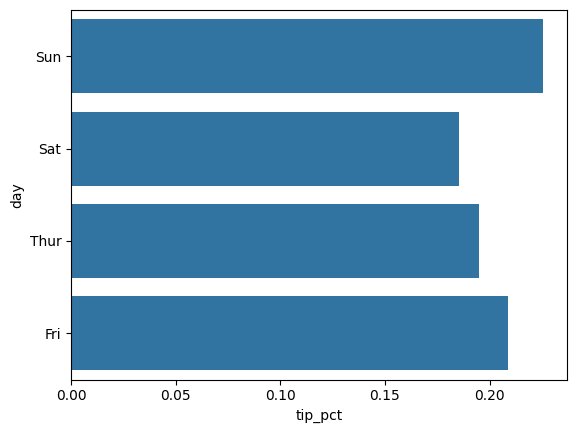

In [12]:
# 요일별 팁의 비중을 시각화(수평 막대 그래프)
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) #tip 비중
print(tips.head())
sns.barplot(x='tip_pct',y = 'day', data = tips, orient = 'h', errorbar=None) #errorbar는 오차 막대를 제어

<ipython-input-39-dce7d0317af1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tip_pct',y = 'day', data = tips, orient = 'h', errorbar=None,width = 0.6, palette='Set2')


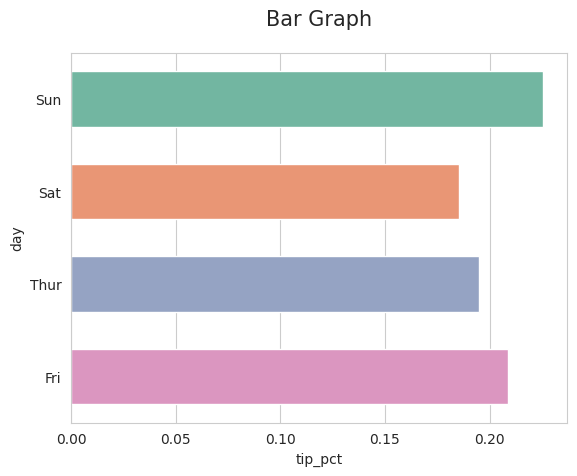

In [39]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
sns.barplot(x='tip_pct',y = 'day', data = tips, orient = 'h', errorbar=None,width = 0.6, palette='Set2')
plt.title('Bar Graph', pad =20, fontsize=15)
plt.show()

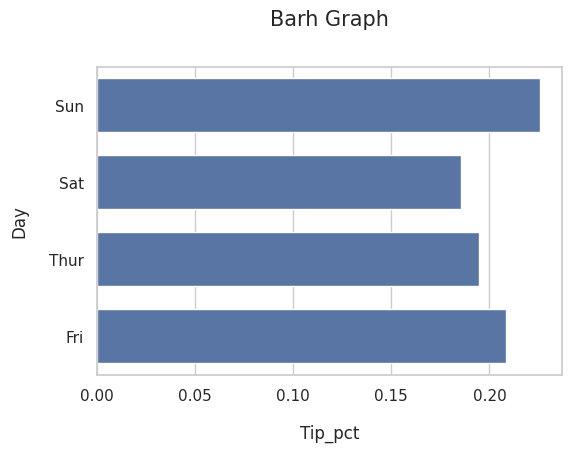

In [40]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.set(style='whitegrid')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
# print(tips.head())
sns.barplot(x='tip_pct',y='day',data=tips, orient='h', errorbar=None, width=0.7) # errorbar는 오차 막대를 제어
plt.title('Barh Graph', pad=30, fontsize=15)
plt.xlabel('Tip_pct',labelpad=15,fontsize=12)
plt.ylabel('Day',labelpad=15,fontsize=12)
plt.show()

<Axes: xlabel='tip_pct', ylabel='day'>

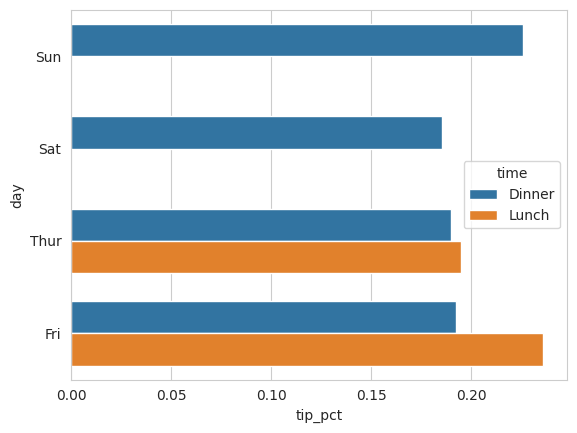

In [30]:
sns.barplot(x='tip_pct',y='day',hue='time',data=tips, orient='h',errorbar=None,width=0.7)

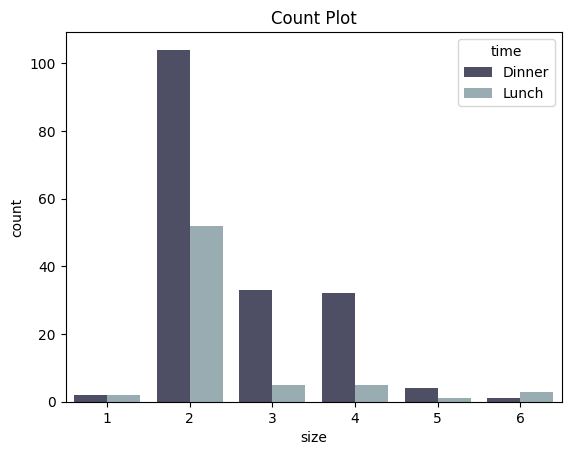

In [14]:
# countplot
sns.countplot(x = 'size', data = tips, hue = 'time', palette='bone')
plt.title('Count Plot')
plt.show()

In [16]:
import seaborn as sns
available_styles = sns.axes_style()
print(available_styles)

{'axes.facecolor': 'white', 'axes.edgecolor': 'black', 'axes.grid': False, 'axes.axisbelow': 'line', 'axes.labelcolor': 'black', 'figure.facecolor': 'white', 'grid.color': '#b0b0b0', 'grid.linestyle': '-', 'text.color': 'black', 'xtick.color': 'black', 'ytick.color': 'black', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>, 'patch.edgecolor': 'black', 'patch.force_edgecolor': False, 'image.cmap': 'viridis', 'font.family': ['sans-serif'], 'font.sans-serif': ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif'], 'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


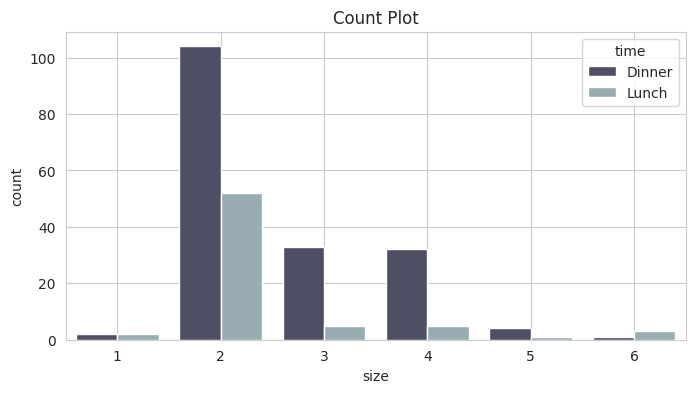

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x = 'size', data = tips, hue = 'time', palette='bone')
sns.set_style('whitegrid')
plt.grid(True)
plt.title('Count Plot')
plt.show()

커널밀도추정(Kernel Density Estimation, KDE)
- kde=True는 Seaborn의 histplot 함수에서 커널 밀도 추정(Kernel Density Estimation, KDE)을 활성화하는 옵션
- 히스토그램과 함께 데이터의 분포를 부드럽게 추정한 커널 밀도 그래프가 표시
- KDE 그래프는 데이터 포인트들이 어떻게 분포되어 있는지 시각적으로 보여주는 부드러운 곡선을 생성

In [41]:
comp1 = np.random.normal(0,1,size=100)
comp2 = np.random.normal(10,2,size=100)

values = pd.Series(np.concatenate([comp1,comp2]))
values.describe()

count    200.000000
mean       5.085593
std        5.419796
min       -2.267674
25%       -0.050722
50%        3.558879
75%       10.319188
max       14.669753
dtype: float64

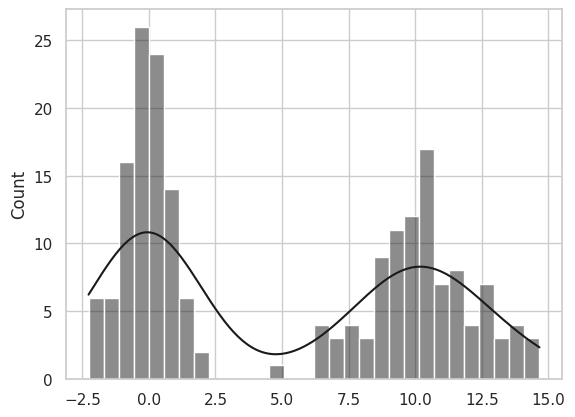

In [44]:
sns.histplot(values,kde=True, bins=30, color='k')
plt.show()

In [45]:
from google.colab import files
uploaded = files.upload()

Saving fm2.csv to fm2.csv


In [46]:
fm2 = pd.read_csv('fm2.csv')
fm2

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


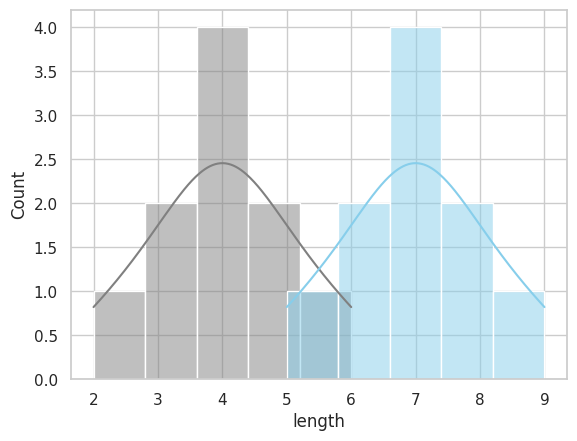

In [50]:
length_a = fm2.query('species == "A"')['length']
length_b = fm2.query('species == "B"')['length']
sns.histplot(length_a, bins=5, color='gray',kde=True)
sns.histplot(length_b, bins=5, color='skyblue',kde=True)
plt.show()

<Axes: xlabel='species', ylabel='length'>

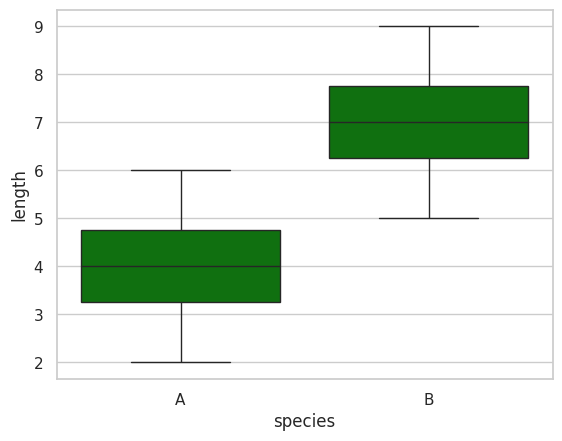

In [51]:
# Q. boxplot으로 A, B 비교

sns.boxplot(x = 'species', y = 'length', data =fm2, color='green')

<Axes: xlabel='species', ylabel='length'>

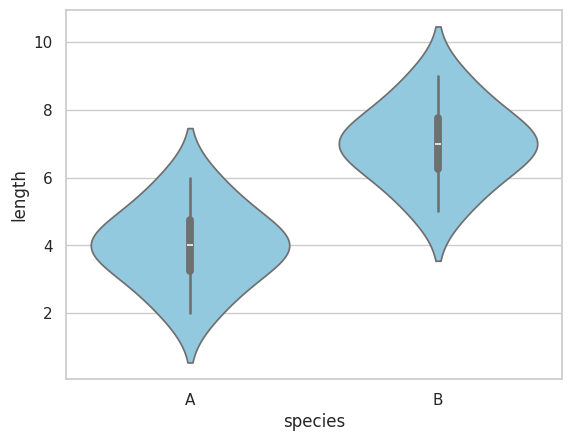

In [53]:
# 바이올렛 플롯 : 박스 플롯과 커널 밀도 추정을 결합한 형태로 데이터의 형태를 좀 더 직관적으로 이해할 수 있게 해준다
# 터널 밀도 추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
sns.violinplot(x='species',y = 'length',data = fm2, color='skyblue')

In [54]:
from google.colab import files
uploaded = files.upload()

Saving cov.csv to cov.csv


In [55]:
cov_data = pd.read_csv('cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


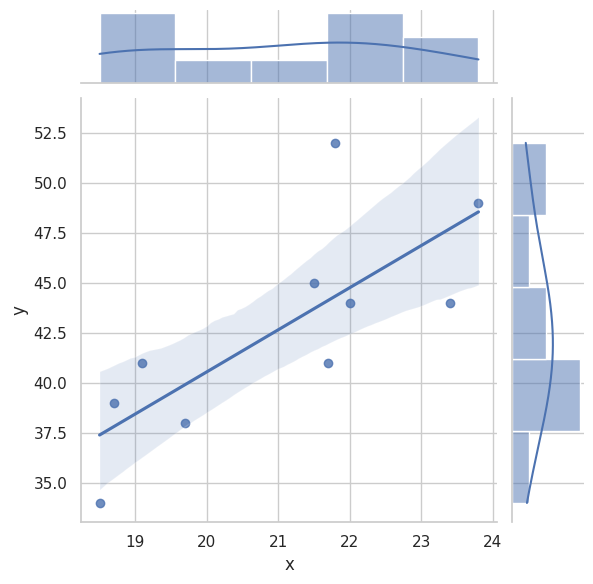

In [56]:
# jointplot은 산점도와 함께 각각의 변수에 대한 히스토그램이나 커널밀도추정을 결합하여
# 변수간의 분포를 동시에 탐색할 수 있게 해준다
sns.jointplot(x = 'x', y ='y', data = cov_data, kind='reg')
plt.show()

sns.lmplot과 sns.regplot 차이점

기능적 차이:
- sns.lmplot: 이 함수는 FacetGrid를 사용하여 데이터를 다양한 카테고리별로 분할하여 여러 서브플롯을 만들 수 있다. 이는 데이터의 서브셋에 대한 회귀선을 별도로 그릴 수 있음을 의미.
sns.regplot: 이 함수는 단일 축 객체(ax)에 회귀선을 그리는 데 사용. 간단하고, 한 번에 하나의 관계만 표시.

사용상의 유연성:
- sns.lmplot은 regplot보다 더 많은 매개변수를 제공하여, 데이터를 세분화하고 다양한 방식으로 표시.
- sns.regplot은 더 단순하고 직관적인 옵션을 제공하여, 빠르고 간편하게 선형 회귀선을 그릴 수 있게 한다.

그래픽 표현의 차이:
- sns.lmplot은 내부적으로 FacetGrid를 사용하므로, 플롯의 구성과 스타일을 더 세밀하게 조정할 수 있다.
- sns.regplot은 주로 간단한 선형 관계를 표시하는데 적합하며, 복잡한 그래픽 설정은 제한적.



In [60]:
np.random.seed(10)
data = pd.DataFrame({
    'x' : np.random.rand(50),
    'y' : np.random.rand(50),
    'category' : np.random.choice(['A','B'],50)
})

In [61]:
data.head()

,x,y,category
0,0.771321,0.392529,A
1,0.020752,0.093460,A
2,0.633648,0.821106,B
3,0.748804,0.151152,B
4,0.498507,0.384114,A


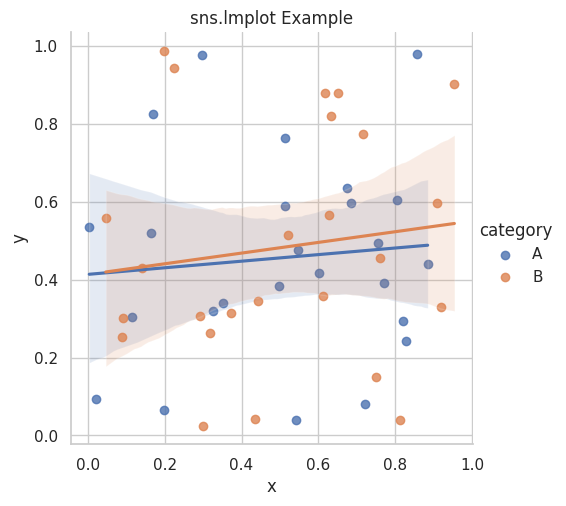

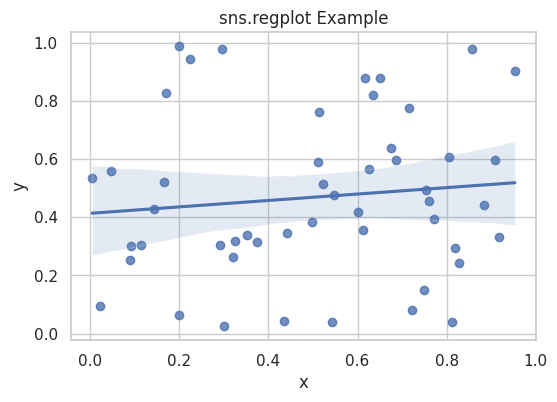

In [62]:
sns.lmplot(x = 'x', y = 'y', data = data, hue='category')
plt.title("sns.lmplot Example")
plt.show()

plt.figure(figsize=(6,4))
sns.regplot(x='x',y='y',data=data)
plt.title("sns.regplot Example")
plt.show()

In [64]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [65]:
df_auto = pd.read_csv('auto-mpg.csv')
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


<Axes: xlabel='mpg'>

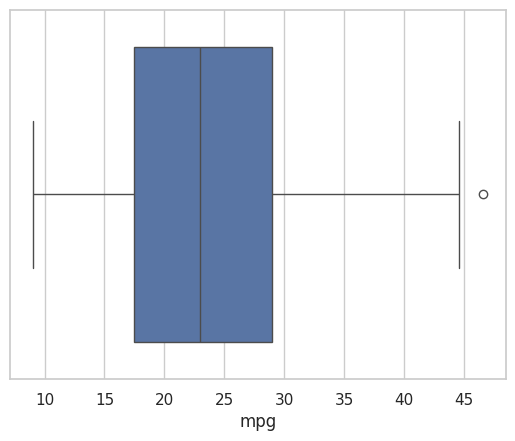

In [67]:
sns.boxplot(data = df_auto, x = 'mpg')

<Axes: ylabel='mpg'>

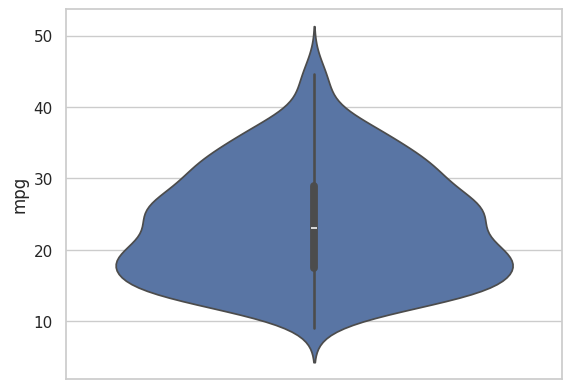

In [68]:
sns.violinplot(data = df_auto.mpg)

<Axes: xlabel='mpg'>

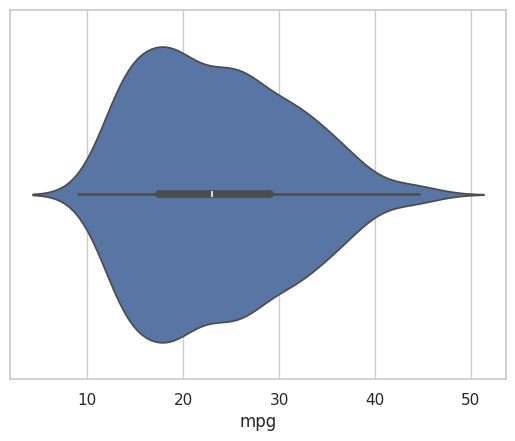

In [69]:
sns.violinplot(data = df_auto, x='mpg')

<Axes: xlabel='model year', ylabel='mpg'>

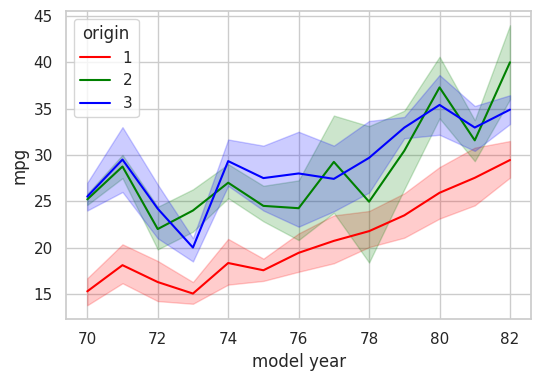

In [70]:
plt.figure(figsize=(6,4))
sns.lineplot(data = df_auto, x = 'model year', y = 'mpg', hue = 'origin',err_style = 'band', palette=['red','green','blue'])


Task1_0618. auto-mpg 데이터 셋에서 mpg와 weight의 선형 관계를 그래프로 작성하세요.(전체, origin에 따른 관계 2개 작성)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [3]:
import pandas as pd
df_auto = pd.read_csv('auto-mpg.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


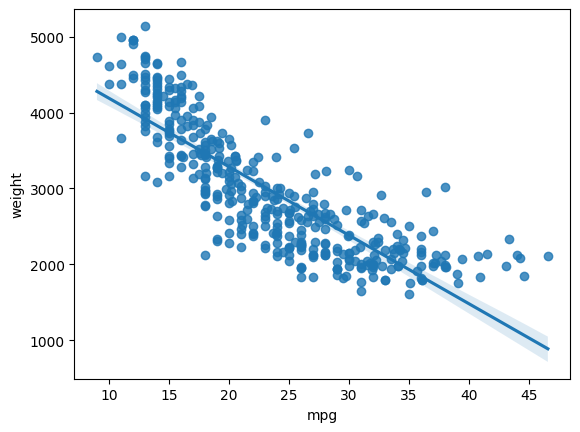

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x = 'mpg', y ='weight',data = df_auto)
plt.show()

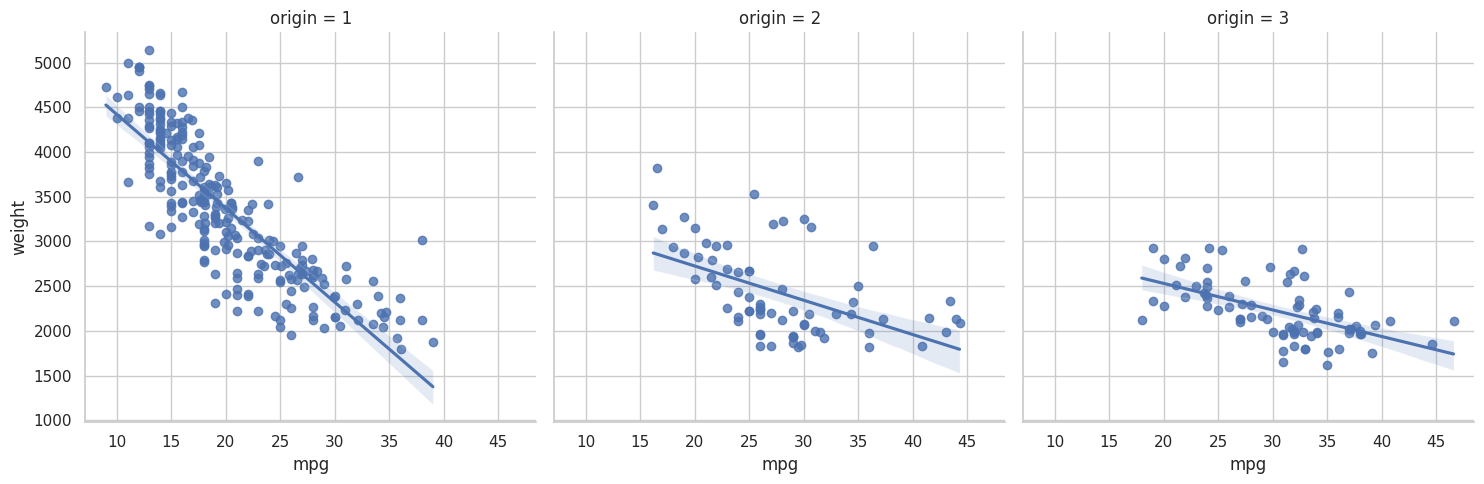

In [74]:
# 첫번째 열 : 전체 데이터에 대한 그래프

sns.lmplot(x='mpg',y='weight',data = df_auto, col = 'origin',col_wrap=3) # col_wrap=3은 한 행에 최대 3개의 그래프를 표시하도록 설정
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

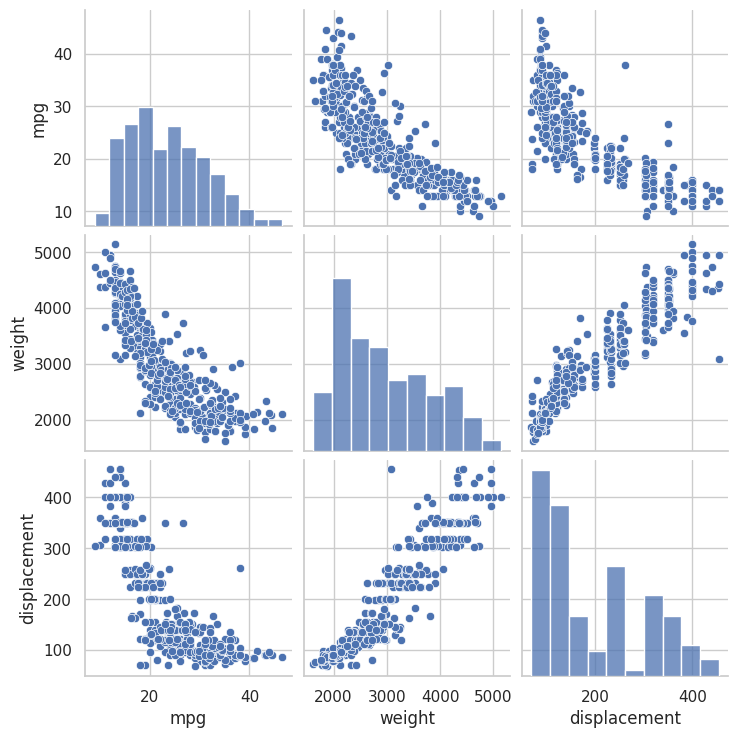

In [75]:
# 본인의 그래프는 히스토그램으로 표현

sns.pairplot(df_auto[['mpg','weight','displacement']], palette='reinbow')

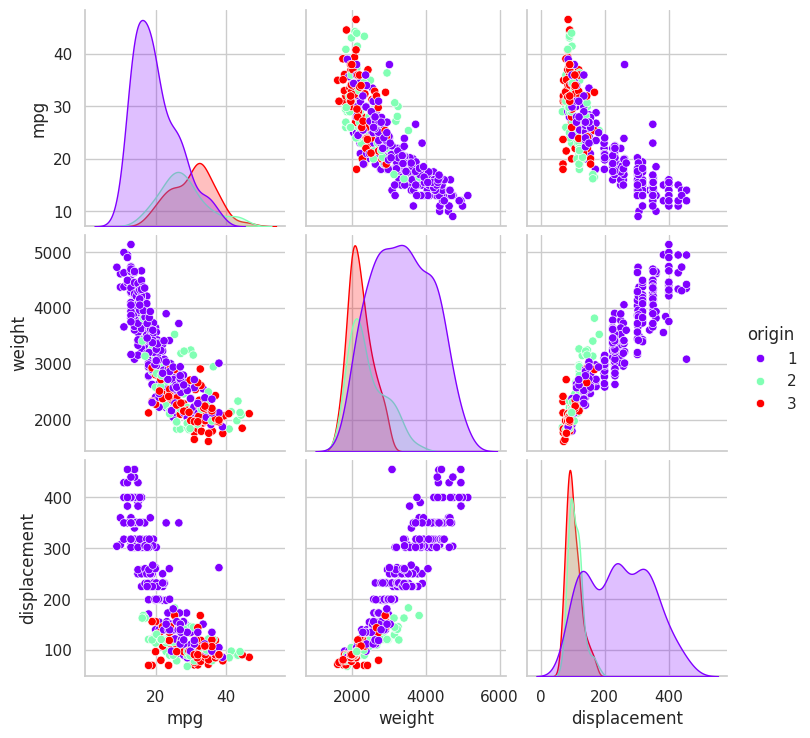

In [78]:
sns.pairplot(df_auto[['mpg','weight','displacement','origin']], palette='rainbow', hue = 'origin', diag_kind = 'kde')

Task2_0618. pairplot을 생성해서 컬럼간의 관계를 시각화 하세요
단 종에 따라 다른 색상을 사용

In [5]:
df_pg = sns.load_dataset('penguins')
df_pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


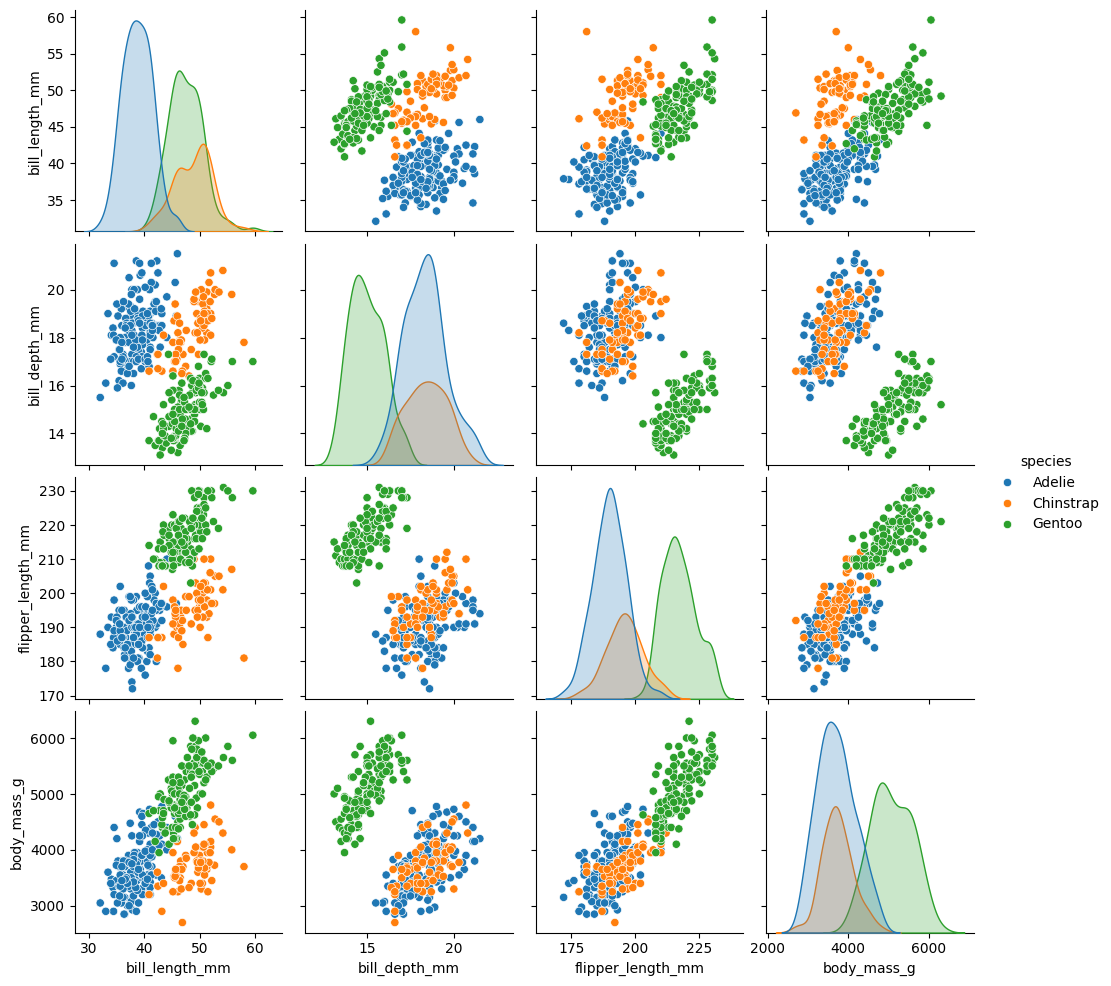

In [7]:
sns.pairplot(df_pg, hue = 'species')
plt.show()

In [12]:
t_df = sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [82]:
t_df[['pclass','age','fare','survived']].corr()

,pclass,age,fare,survived
pclass,1.000000,-0.369226,-0.549500,-0.338481
age,-0.369226,1.000000,0.096067,-0.077221
fare,-0.549500,0.096067,1.000000,0.257307
survived,-0.338481,-0.077221,0.257307,1.000000


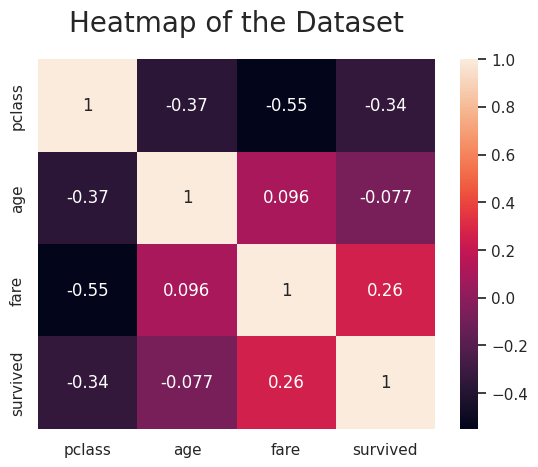

In [85]:
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',pad=20, fontsize=20)
plt.show()

Task3_0618. 펭귄 데이터셋을 사용하여, 각 종별로 섬(island)별 개체 수를 나타내는 카운트 플롯을 생성하세요. x축은 'island', hue는 'species'로 설정하세요.

In [8]:
df_pg = sns.load_dataset('penguins')
df_pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


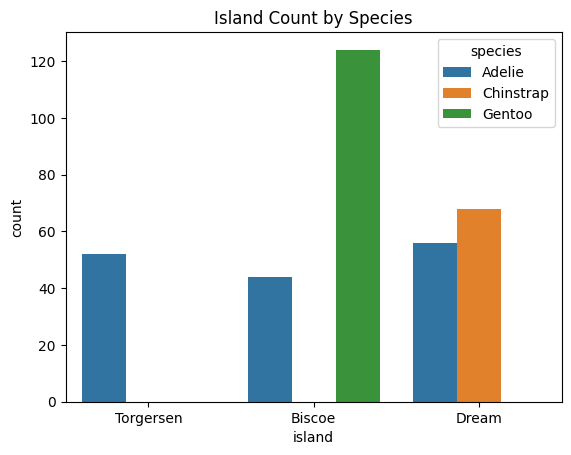

In [11]:
sns.countplot(data = df_pg, x = 'island', hue ='species')
plt.title('Island Count by Species')
plt.show()

Task4_0618. sex와 class간의 생존율을 보여주는 히트맵을 작성하세요.

In [17]:
t_df = sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
t_df['sex'] = t_df['sex'].replace(['male','female'],[0,1])

In [25]:
t_df['class'] = t_df['class'].replace(['First','Second','Third'],[1,2,3])

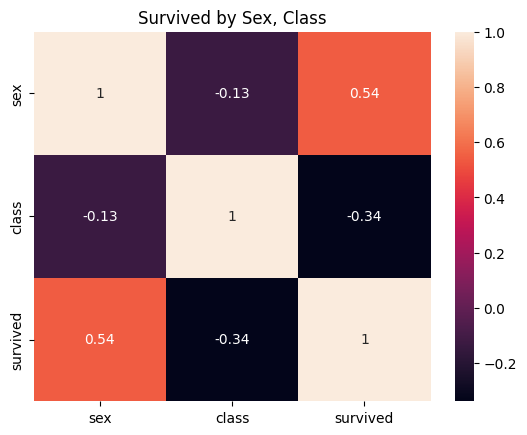

In [26]:
sns.heatmap(t_df[['sex','class','survived']].corr(), annot=True)
plt.title('Survived by Sex, Class')
plt.show()

Task5_0618. 타이타닉 데이터셋을 사용하여, 객실 등급(class)에 따른 탑승객의 나이를 나타내는 박스 플롯과 바이올린 플롯을 같은 그래프 내에서 나란히 생성하세요. 이를 통해 각 클래스별 나이 분포의 차이를 비교하세요.

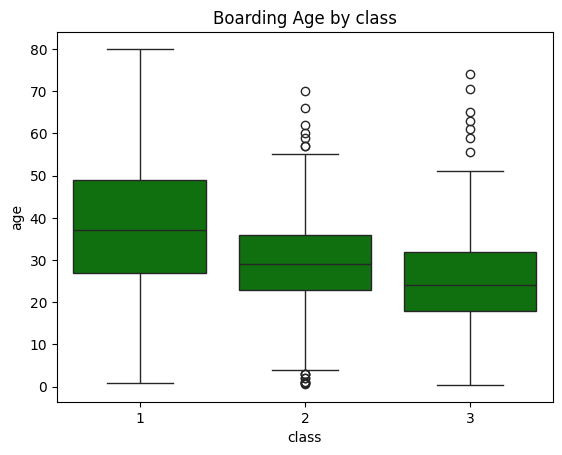

In [31]:
sns.boxplot(data = t_df, x ='class',y = 'age',color = 'green')
plt.title('Boarding Age by class')
plt.show()

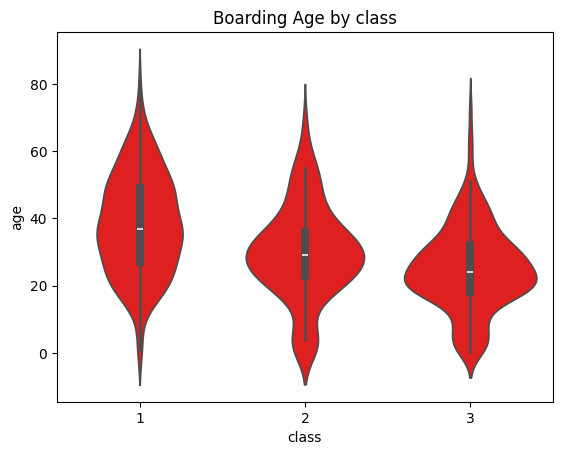

In [32]:
sns.violinplot(data = t_df, x= 'class', y = 'age',color = 'red')
plt.title('Boarding Age by class')
plt.show()

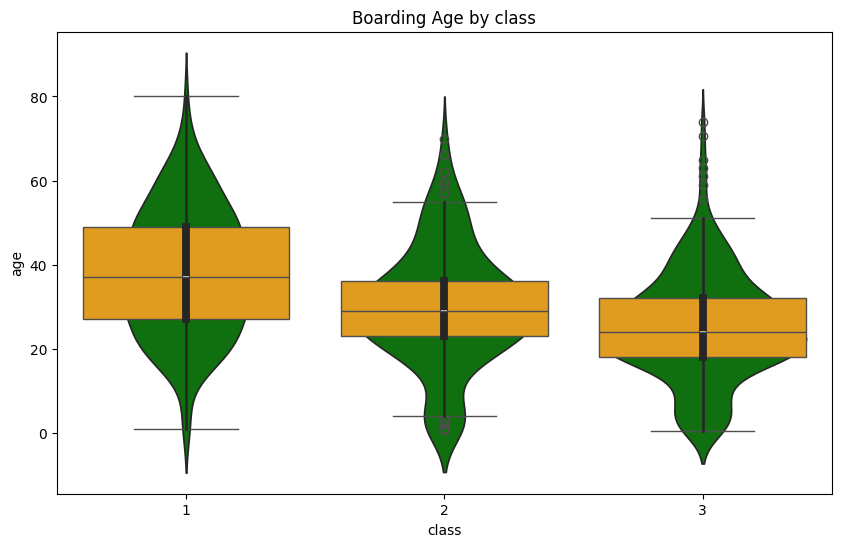

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data = t_df, x ='class',y = 'age',ax=ax,color='orange')
sns.violinplot(data = t_df, x= 'class', y = 'age',ax=ax,color='green')
ax.set_title('Boarding Age by class')
plt.show()

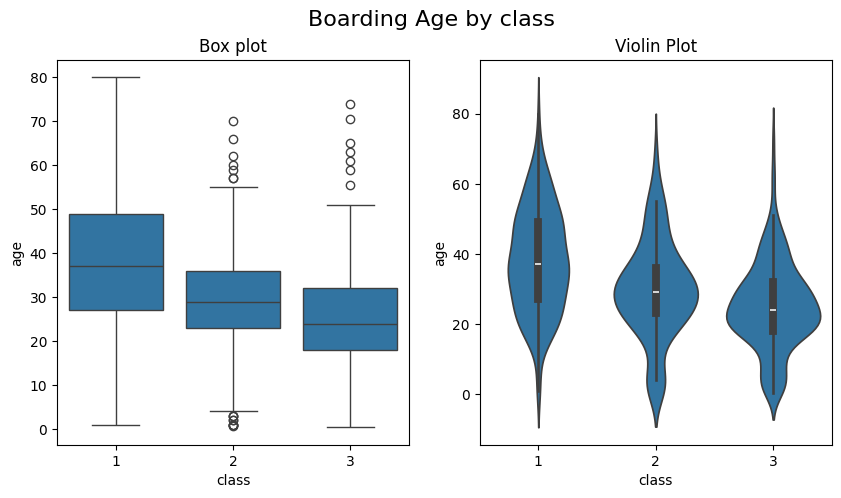

In [40]:
fig, axes = plt.subplots(1,2,figsize=(10, 5))

fig.suptitle('Boarding Age by class', fontsize=16)

sns.boxplot(data = t_df, x ='class',y = 'age',ax=axes[0])
axes[0].set_title('Box plot')

sns.violinplot(data = t_df, x= 'class', y = 'age',ax=axes[1])
axes[1].set_title('Violin Plot')
plt.show()